### How to write some important SQL `statements` and `queries`. Retrieving data from a single table and from two tables and performing some actions in a given table.
- - - 

###  After installing `ipython-sql` and `mysqlclient` libraries, let's load the external   `SQL module`

In [1]:
%load_ext sql

### Connecting to our `database`

In [2]:
%sql mysql+mysqldb://root@localhost:3306/accidents

> **Note**: We will use **`ALIASES`** several times to improve **quickness** and **readability**.

### &rarr; Accident table



### Create a primary key to speed up operations

In [3]:
%sql ALTER TABLE `accidents2` ADD PRIMARY KEY(`accident_index`);

 * mysql+mysqldb://root@localhost:3306/accidents
0 rows affected.


[]

### Convert datatype VARCHAR to DATE

In [4]:
%sql ALTER TABLE accidents2 ADD COLUMN new_date DATE 
%sql UPDATE accidents2 SET new_date = STR_TO_DATE(date, '%d/%m/%Y')
%sql alter table accidents2 drop column date


 * mysql+mysqldb://root@localhost:3306/accidents
0 rows affected.
 * mysql+mysqldb://root@localhost:3306/accidents
91199 rows affected.
 * mysql+mysqldb://root@localhost:3306/accidents
0 rows affected.


[]


### Displaying the first 5 rows 

In [5]:
%sql SELECT * FROM accidents2 limit 5;

 * mysql+mysqldb://root@localhost:3306/accidents
5 rows affected.


accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,new_date
2020010219808,2020,010219808,521389,175144,-0.25400,51.46226,1,3,1,1,3,09:00,10,E09000032,E09000032,6,0,6,20,0,-1,0,-1,9,9,1,9,9,0,0,1,3,2,E01004576,2020-02-04
2020010220496,2020,010220496,529337,176237,-0.13925,51.47032,1,3,1,2,2,13:55,9,E09000022,E09000022,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1,1,2,E01003034,2020-04-27
2020010228005,2020,010228005,526432,182761,-0.17871,51.52961,1,3,1,1,4,01:25,1,E09000033,E09000033,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1,1,2,E01004726,2020-01-01
2020010228006,2020,010228006,538676,184371,-0.00168,51.54121,1,2,1,1,4,01:50,17,E09000025,E09000025,3,11,6,30,0,-1,0,-1,0,4,4,1,1,0,0,1,1,2,E01003617,2020-01-01
2020010228011,2020,010228011,529324,181286,-0.13759,51.51570,1,3,1,2,4,02:25,1,E09000033,E09000033,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1,1,2,E01004763,2020-01-01


### &rarr; vehicles table

### Displaying the first 5 rows 

In [6]:
%sql SELECT * FROM vehicles limit 5;

 * mysql+mysqldb://root@localhost:3306/accidents
5 rows affected.


accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
2020010219808,2020,010219808,1,9,9,5,1,5,0,0,0,0,0,0,4,9,6,2,32,6,1968,2,6,AUDI Q5,4,1
2020010220496,2020,010220496,1,9,0,4,2,6,0,2,0,0,0,0,1,1,2,1,45,7,1395,1,2,AUDI A1,7,1
2020010228005,2020,010228005,1,9,0,18,-1,-1,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,-1,-1,-1
2020010228006,2020,010228006,1,8,0,18,1,5,0,0,0,0,0,0,1,1,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
2020010228011,2020,010228011,1,9,0,18,3,7,9,1,0,0,0,0,1,1,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1


## &rarr; Some interesting questions:

### 1 - How to delete records that only create noise like the ones regarding missing data and the ones that are out of range?

- Regarding the **accident table**, the columns **road_type** and **road_surface_conditions**  have **records with value '-1' that concern **missing data** or **'out of range'**, let's **delete those records**. Also, as **records for 'urban_or_rural_area' with value 3 regards 'Unallocated' areas**, let's **remove those records**.
<br><br>
- Regarding the **vehicle table**, the columns **vehicle_type** and **age_band_of_driver** have **records with value '-1'** that also concerns **missing data** or **'out of range'**, let's **delete those records as well**.

In [7]:
%sql DELETE FROM accidents2 WHERE road_type=-1 OR road_surface_conditions=-1 OR urban_or_rural_area=3

 * mysql+mysqldb://root@localhost:3306/accidents
329 rows affected.


[]

In [8]:
%sql DELETE FROM vehicles WHERE vehicle_type=-1 OR age_band_of_driver=-1;

 * mysql+mysqldb://root@localhost:3306/accidents
23344 rows affected.


[]

### 2 - Is there any correlation between the day of the week and the number of accidents? 

In [9]:
%sql SELECT day_of_week AS 'Day of the Week', \
COUNT(accident_index) AS 'Number of Accidents' \
FROM accidents2 \
GROUP BY (day_of_week);

 * mysql+mysqldb://root@localhost:3306/accidents
7 rows affected.


Day of the Week,Number of Accidents
1,10287
2,12723
3,13223
4,13499
5,14008
6,14837
7,12293



###  2.1 - Let's plot to visualize data using `Matplotlib`
> **Note**: We created another table - **day** - that displays the meaning of each value that the field 'day_of_week' can assume.

In [10]:
df =  %sql SELECT day_of_week, count(accident_index), label FROM accidents2 a, day d \
WHERE a.day_of_week = d.code GROUP BY (day_of_week)

df = df.DataFrame()

 * mysql+mysqldb://root@localhost:3306/accidents
7 rows affected.


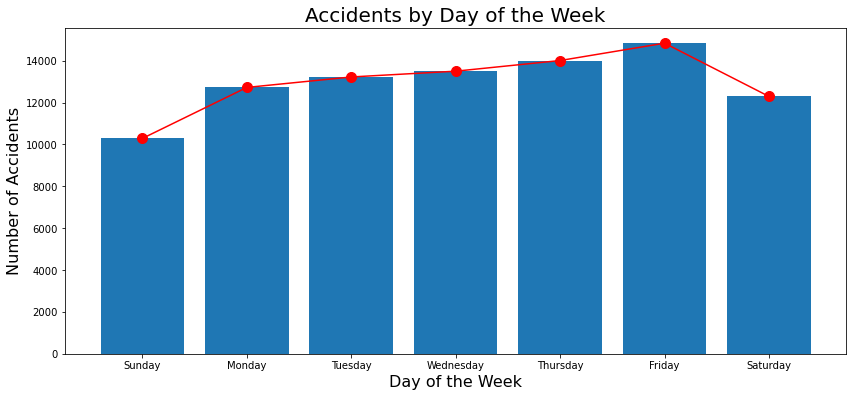

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (14,6)

plt.bar(df['label'], df['count(accident_index)'])
plt.plot(df['label'], df['count(accident_index)'], color='red', marker='o', markersize=10)
plt.xlabel("Day of the Week", fontsize = 16 )
plt.ylabel("Number of Accidents", fontsize = 16)
plt.title("Accidents by Day of the Week", fontsize = 20)
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)
plt.show()
                        

### 2.2 - Comments: 
- The **number of accidents is higher on weekdays than on the weekend**, which **was expected** because, most likely, there was **more traffic on weekdays**.
- The **number of accidents increases from Monday to Friday**.
<br>

### 3 - What was the proportion of accidents that took place in urban and rural areas?

In [12]:
%sql SELECT urban_or_rural_area AS 'Urban or Rural Area', \
(COUNT(urban_or_rural_area) / (Select COUNT(*) FROM accidents2)) AS Proportion \
FROM accidents2 \
GROUP BY urban_or_rural_area

 * mysql+mysqldb://root@localhost:3306/accidents
2 rows affected.


Urban or Rural Area,Proportion
1,0.6769
2,0.3231


### 3.1 - Comment:
- Approximately **2/3 of the accidents occurred in urban areas** and almost **1/3 in rural areas**. This **was to be expected due to urban areas have (much) more traffic than rural areas**. There might be **other reasons** for the number of accidents that happened in urban areas to be twice as much as the number of accidents that occurred in rural areas like, for instance, **different weather conditions and distinct road surface conditions**, among other reasons.
<br>

### 4 - Count the number of accidents by accident severity 

In [13]:
%sql SELECT accident_severity AS 'Accident Severity', \
COUNT(accident_index) AS 'Number of Accidents' \
FROM accidents2 \
GROUP BY (accident_severity);

 * mysql+mysqldb://root@localhost:3306/accidents
3 rows affected.


Accident Severity,Number of Accidents
1,1387
2,18311
3,71172


### 4.1-  Let's plot to visualize data using `Matplotlib`
> **Note**: We created another table - **severity** - that displays the meaning of each value that the field 'accident_severity' can assume.

In [14]:
df = %sql select accident_severity, count(accident_index), label FROM accidents2 a, severity s \
WHERE a.accident_severity = s.code GROUP BY (accident_severity) 
df = df.DataFrame()

 * mysql+mysqldb://root@localhost:3306/accidents
3 rows affected.


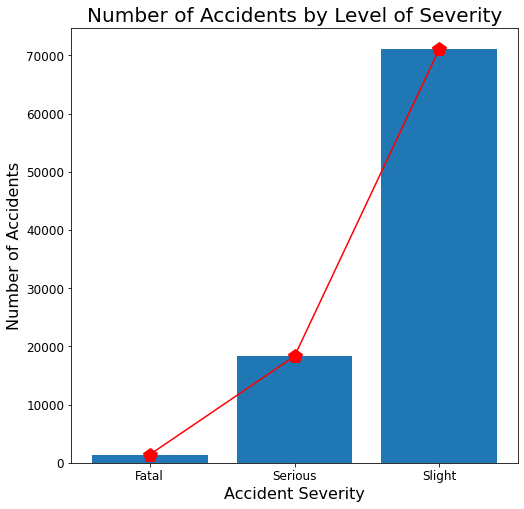

In [15]:
plt.rcParams["figure.figsize"] = (8,8)

plt.bar(df['label'], df['count(accident_index)'])
plt.plot(df['label'], df['count(accident_index)'], color='red', marker='p', markersize=14)
plt.xlabel("Accident Severity", fontsize = 16)
plt.ylabel("Number of Accidents", fontsize = 16)
plt.title("Number of Accidents by Level of Severity", fontsize = 20)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()



### 4.2 - Comment: 
- Fortunately, the **severity of the great majority of accidents was slight**.
<br>

### 5 - Count the total number of accidents by vehicle type. Sort in descending order of number of accidents.

In [16]:
%sql SELECT vehicle_type AS 'Vehicle Type', \
COUNT(vehicle_type) AS 'Number of Accidents by Vehicle Type' \
FROM vehicles GROUP BY vehicle_type \
ORDER BY COUNT(accident_index) DESC

 * mysql+mysqldb://root@localhost:3306/accidents
20 rows affected.


Vehicle Type,Number of Accidents by Vehicle Type
9,96168
1,16186
19,8352
3,7195
5,3696
21,2261
8,2114
11,1961
4,1612
2,1041


### 5.1 - Comment:
- **In the majority of the accidents there was at least one car involved**, which can't be considered as surprising...
<br>

### 6 -  Count the number of accidents by accident severity and vehicle type.
### - Create a column named 'assessement', in case of  the of  number of accidents was less than 10 output 'not bad'; if it was equal or greater than 10 and less then 100 output 'could be worse'; lastly if it was greater then 100 output 'terrible'.

In [17]:
%sql SELECT vehicle_type AS 'Vehicle Type', accident_severity AS 'Accident Severity', COUNT(accident_severity ) \
AS 'Number of Accidents', \
CASE WHEN count(accident_severity) <=10 THEN 'not bad' \
WHEN COUNT(accident_severity) >10 AND count(accident_severity)<100 THEN 'could be worse' \
ELSE 'terrible' END AS assessement \
FROM accidents2 a JOIN vehicles v \
ON a.accident_index = v.accident_index \
GROUP BY v.vehicle_type, a.accident_severity 

 * mysql+mysqldb://root@localhost:3306/accidents
58 rows affected.


Vehicle Type,Accident Severity,Number of Accidents,assessement
1,1,147,terrible
1,2,3952,terrible
1,3,12011,terrible
2,1,3,not bad
2,2,247,terrible
2,3,788,terrible
3,1,59,could be worse
3,2,1700,terrible
3,3,5421,terrible
4,1,37,could be worse


### 6.1 - Comment:
- **For all vehicle types the following applies**:
    - **The number of accidents with slight severity was higher than the number of accidents with serious severity**. 
    - **The number of accidents with serious severity was higher than the number of accidents with fatal severity**.
<br>

### 7 - What was percentage of accidents by accident severity?

In [18]:
%sql SELECT accident_severity, \
100*COUNT(accident_severity)/(Select COUNT(accident_severity) FROM accidents2) AS 'percentage of accidents by level of severity'\
FROM accidents2 \
GROUP BY accident_severity


 * mysql+mysqldb://root@localhost:3306/accidents
3 rows affected.


accident_severity,percentage of accidents by level of severity
1,1.5264
2,20.1508
3,78.3229


### 8 - At what hour most accidents happened by day of the week? Output the days of the week, the hour and the number of accidents.

In [19]:
%sql SELECT day_of_week, \
            hour, \
            number_accidents \
FROM (SELECT day_of_week, \
      HOUR(time) AS hour, \
      COUNT(HOUR(time)) AS number_accidents, \
      RANK() OVER (PARTITION BY day_of_week ORDER BY COUNT(HOUR(time)) DESC) AS rnk \
    FROM accidents2 \
    GROUP BY day_of_week, hour \
    ORDER BY day_of_week) t \
WHERE rnk = 1


 * mysql+mysqldb://root@localhost:3306/accidents
7 rows affected.


day_of_week,hour,number_accidents
1,14,861
2,17,1209
3,17,1210
4,17,1193
5,17,1286
6,17,1268
7,14,907


### 9 - Find the days of the week with more casualties than the average across all days of the week

In [20]:
%sql WITH casualties_by_day AS (SELECT day_of_week, \
            SUM(number_of_casualties) AS total_casualties_by_day \
            FROM accidents2 \
            GROUP BY day_of_week), \
    average AS (SELECT cast(AVG(total_casualties_by_day) AS int) AS average_casualties \
                FROM casualties_by_day) \
SELECT * \
FROM casualties_by_day ca \
JOIN average av \
ON ca.total_casualties_by_day > av.average_casualties


 * mysql+mysqldb://root@localhost:3306/accidents
4 rows affected.


day_of_week,total_casualties_by_day,average_casualties
3,16467,16457
4,16870,16457
5,17446,16457
6,18757,16457


### 10 - Calculate the quarter-over-quarter percentage change in casualties, rounded to the 2nd decimal point

In [21]:
%sql SELECT QUARTER(new_date) AS quarter,  \
ROUND((SUM(number_of_casualties) - LAG(SUM(number_of_casualties)) OVER (ORDER BY new_date))\
    / LAG(SUM(number_of_casualties)) OVER (ORDER BY new_date ) * 100, 2) AS casualties_perc_diff \
FROM accidents2 \
GROUP BY quarter 


 
 

 * mysql+mysqldb://root@localhost:3306/accidents
4 rows affected.


quarter,casualties_perc_diff
1,None
2,-38.87
3,73.24
4,-8.20


###  11 - Identify the three days with most casualties by quarter. Output the quarter, the day and the number of casualties

In [22]:
%sql SELECT quarter, day, n_casualties FROM (SELECT QUARTER(new_date) AS quarter, \
DATE(new_date) AS day, \
SUM(number_of_casualties) AS n_casualties, RANK() OVER(PARTITION BY QUARTER(new_date) \
ORDER BY SUM(number_of_casualties) DESC) AS rnk \
FROM accidents2 \
GROUP BY quarter, day) t \
WHERE rnk<=3

 * mysql+mysqldb://root@localhost:3306/accidents
12 rows affected.


quarter,day,n_casualties
1,2020-01-10,511
1,2020-02-06,563
1,2020-03-06,518
2,2020-06-24,377
2,2020-06-25,447
2,2020-06-26,366
3,2020-07-31,488
3,2020-08-28,471
3,2020-09-18,496
4,2020-11-04,507
